In [139]:
import pandas as pd

df = pd.read_csv(r'C:\Users\clint\Desktop\RER\Code\18_africa_latin_america.csv')
df

,Sending Country,Receiving Country,Year,Value,Unit,Source,Region
0,Algeria,Senegal,2021,0.183414825,USD millions,BCEAO,Africa
1,Australia,Ethiopia,2020,13.59617511,USD millions,National Bank of Ethiopia,Africa
2,Australia,Kenya,2024,"184,497.099695719",USD millions,Central Bank of Kenya,Africa
3,Australia,Uganda,2022,22,USD millions,Bank of Uganda,Africa
4,Austria,Kenya,2024,"13,169.065145833",USD millions,Central Bank of Kenya,Africa
...,...,...,...,...,...,...,...
1347,Suriname,Colombia,2019,2.449,USD millions,Roland Kpodar (IMF),Latin America
1348,Suriname,Colombia,2020,1.778,USD millions,Roland Kpodar (IMF),Latin America
1349,Suriname,Guyana,2018,2.064,USD millions,Roland Kpodar (IMF),Latin America
1350,Suriname,Guyana,2019,1.6480000000000001,USD millions,Roland Kpodar (IMF),Latin America


In [140]:
# Check column names first
print("Column names:")
print(df.columns.tolist())
print("\nDataframe shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Column names:
['Sending Country', 'Receiving Country', 'Year', 'Value', 'Unit', 'Source', 'Region']

Dataframe shape: (1352, 7)

First few rows:
  Sending Country Receiving Country  Year              Value          Unit  \
0         Algeria           Senegal  2021        0.183414825  USD millions   
1       Australia          Ethiopia  2020        13.59617511  USD millions   
2       Australia             Kenya  2024  184,497.099695719  USD millions   
3       Australia            Uganda  2022                 22  USD millions   
4         Austria             Kenya  2024   13,169.065145833  USD millions   

                      Source  Region  
0                      BCEAO  Africa  
1  National Bank of Ethiopia  Africa  
2      Central Bank of Kenya  Africa  
3             Bank of Uganda  Africa  
4      Central Bank of Kenya  Africa  


In [141]:
# Top sending countries by number of records
print("TOP SENDING COUNTRIES (by number of records):")
print("=" * 50)
top_sending = df['Sending Country'].value_counts()
for i, (country, count) in enumerate(top_sending.head(10).items(), 1):
    print(f"{i:2d}. {country:<25} {count:4d} records")

print("\n\nTOP RECEIVING COUNTRIES (by number of records):")
print("=" * 50)
top_receiving = df['Receiving Country'].value_counts()
for i, (country, count) in enumerate(top_receiving.head(10).items(), 1):
    print(f"{i:2d}. {country:<25} {count:4d} records")

TOP SENDING COUNTRIES (by number of records):
 1. Georgia                    203 records
 2. Philippines                201 records
 3. Brazil                      27 records
 4. France                      26 records
 5. Canada                      24 records
 6. Italy                       24 records
 7. Germany                     23 records
 8. Spain                       23 records
 9. Cabo Verde                  23 records
10. United Kingdom              21 records


TOP RECEIVING COUNTRIES (by number of records):
 1. Ecuador                    189 records
 2. Mexico                     169 records
 3. Panama                     102 records
 4. Brazil                      78 records
 5. Cabo Verde                  60 records
 6. Suriname                    57 records
 7. Senegal                     47 records
 8. Paraguay                    42 records
 9. Colombia                    41 records
10. Kenya                       40 records


In [142]:
import plotly.express as px

# Create temporal distribution
year_dist = df['Year'].value_counts().sort_index()

# Create temporal analysis
fig_temporal = px.bar(
    x=year_dist.index, 
    y=year_dist.values,
    title="Remittance Data Availability by Year<br><sub>Number of records per year shows data collection completeness</sub>",
    labels={"x": "Year", "y": "Number of Records"},
    color_discrete_sequence=["#d62728"]  # Simple red color for all bars
)

fig_temporal.update_layout(
    title_font_size=16,
    height=400,
    showlegend=False
)

fig_temporal.show()

# Print summary statistics
print("\n=== DATA COMPLETENESS SUMMARY ===")
print(f"• Total remittance records: {len(df)}")
print(f"• Time period: {df['Year'].min()}-{df['Year'].max()}")
print(f"• Sending countries: {df['Sending Country'].nunique()} (good global coverage)")
print(f"• Receiving countries: {df['Receiving Country'].nunique()}")
print(f"• Peak data collection in {year_dist.idxmax()} ({year_dist.max()} records)")

# Show year distribution details
print(f"\nYear-by-year breakdown:")
for year, count in year_dist.items():
    print(f"  {year}: {count} records")


=== DATA COMPLETENESS SUMMARY ===
• Total remittance records: 1352
• Time period: 2018-2024
• Sending countries: 207 (good global coverage)
• Receiving countries: 75
• Peak data collection in 2022 (408 records)

Year-by-year breakdown:
  2018: 208 records
  2019: 218 records
  2020: 245 records
  2021: 240 records
  2022: 408 records
  2024: 33 records


In [143]:
# Prepare data for world maps
sending_country_counts = df['Sending Country'].value_counts().reset_index()
sending_country_counts.columns = ['Country', 'Record_Count']

receiving_country_counts = df['Receiving Country'].value_counts().reset_index()
receiving_country_counts.columns = ['Country', 'Record_Count']

print("Sending countries data prepared:")
print(sending_country_counts.head())
print(f"\nReceiving countries data prepared:")
print(receiving_country_counts.head())

Sending countries data prepared:
       Country  Record_Count
0      Georgia           203
1  Philippines           201
2       Brazil            27
3       France            26
4       Canada            24

Receiving countries data prepared:
      Country  Record_Count
0     Ecuador           189
1      Mexico           169
2      Panama           102
3      Brazil            78
4  Cabo Verde            60


In [144]:
# Create world map for SENDING countries data availability
fig_sending = px.choropleth(
    sending_country_counts,
    locations="Country",
    locationmode="country names",
    color="Record_Count",
    hover_name="Country",
    hover_data={"Record_Count": True},
    color_continuous_scale="Reds",
    title="Remittance Data Availability: SENDING Countries<br><sub>Number of remittance records by sending country</sub>",
    labels={"Record_Count": "Number of Records"}
)

fig_sending.update_layout(
    title_font_size=16,
    geo=dict(showframe=False, showcoastlines=True),
    height=600
)

fig_sending.show()

print(f"Countries with NO sending data: {195 - len(sending_country_counts)} out of ~195 world countries")
print(f"Countries with sending data: {len(sending_country_counts)}")
print(f"Coverage: {len(sending_country_counts)/195*100:.1f}% of world countries")

Countries with NO sending data: -12 out of ~195 world countries
Countries with sending data: 207
Coverage: 106.2% of world countries


In [145]:
# Create world map for RECEIVING countries data availability
fig_receiving = px.choropleth(
    receiving_country_counts,
    locations="Country",
    locationmode="country names",
    color="Record_Count",
    hover_name="Country",
    hover_data={"Record_Count": True},
    color_continuous_scale="Reds",
    title="Remittance Data Availability: RECEIVING Countries<br><sub>Number of remittance records by receiving country</sub>",
    labels={"Record_Count": "Number of Records"}
)

fig_receiving.update_layout(
    title_font_size=16,
    geo=dict(showframe=False, showcoastlines=True),
    height=600
)

fig_receiving.show()

print(f"\nRECEIVING COUNTRIES ANALYSIS:")
print(f"Countries with receiving data: {len(receiving_country_counts)}")
print(f"Countries with NO receiving data: {195 - len(receiving_country_counts)} out of ~195 world countries")
print(f"Coverage: {len(receiving_country_counts)/195*100:.1f}% of world countries")

print(f"\nTop receiving countries:")
for i, row in receiving_country_counts.head(10).iterrows():
    print(f"  {row['Country']}: {row['Record_Count']} records")


RECEIVING COUNTRIES ANALYSIS:
Countries with receiving data: 75
Countries with NO receiving data: 120 out of ~195 world countries
Coverage: 38.5% of world countries

Top receiving countries:
  Ecuador: 189 records
  Mexico: 169 records
  Panama: 102 records
  Brazil: 78 records
  Cabo Verde: 60 records
  Suriname: 57 records
  Senegal: 47 records
  Paraguay: 42 records
  Colombia: 41 records
  Kenya: 40 records


In [146]:
# Import additional libraries for heatmaps
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")


📊 RECEIVING COUNTRIES TEMPORAL ANALYSIS

Receiving countries heatmap dimensions:
• Countries: 75
• Years: 6
• Total data points: 450

Top 10 receiving countries by record count:
   1. Ecuador: 189 records
   2. Mexico: 169 records
   3. Panama: 102 records
   4. Brazil: 78 records
   5. Cabo Verde: 60 records
   6. Suriname: 57 records
   7. Senegal: 47 records
   8. Paraguay: 42 records
   9. Colombia: 41 records
  10. Kenya: 40 records

📊 RECEIVING COUNTRIES TEMPORAL ANALYSIS

Receiving countries heatmap dimensions:
• Countries: 75
• Years: 6
• Total data points: 450

Top 10 receiving countries by record count:
   1. Ecuador: 189 records
   2. Mexico: 169 records
   3. Panama: 102 records
   4. Brazil: 78 records
   5. Cabo Verde: 60 records
   6. Suriname: 57 records
   7. Senegal: 47 records
   8. Paraguay: 42 records
   9. Colombia: 41 records
  10. Kenya: 40 records


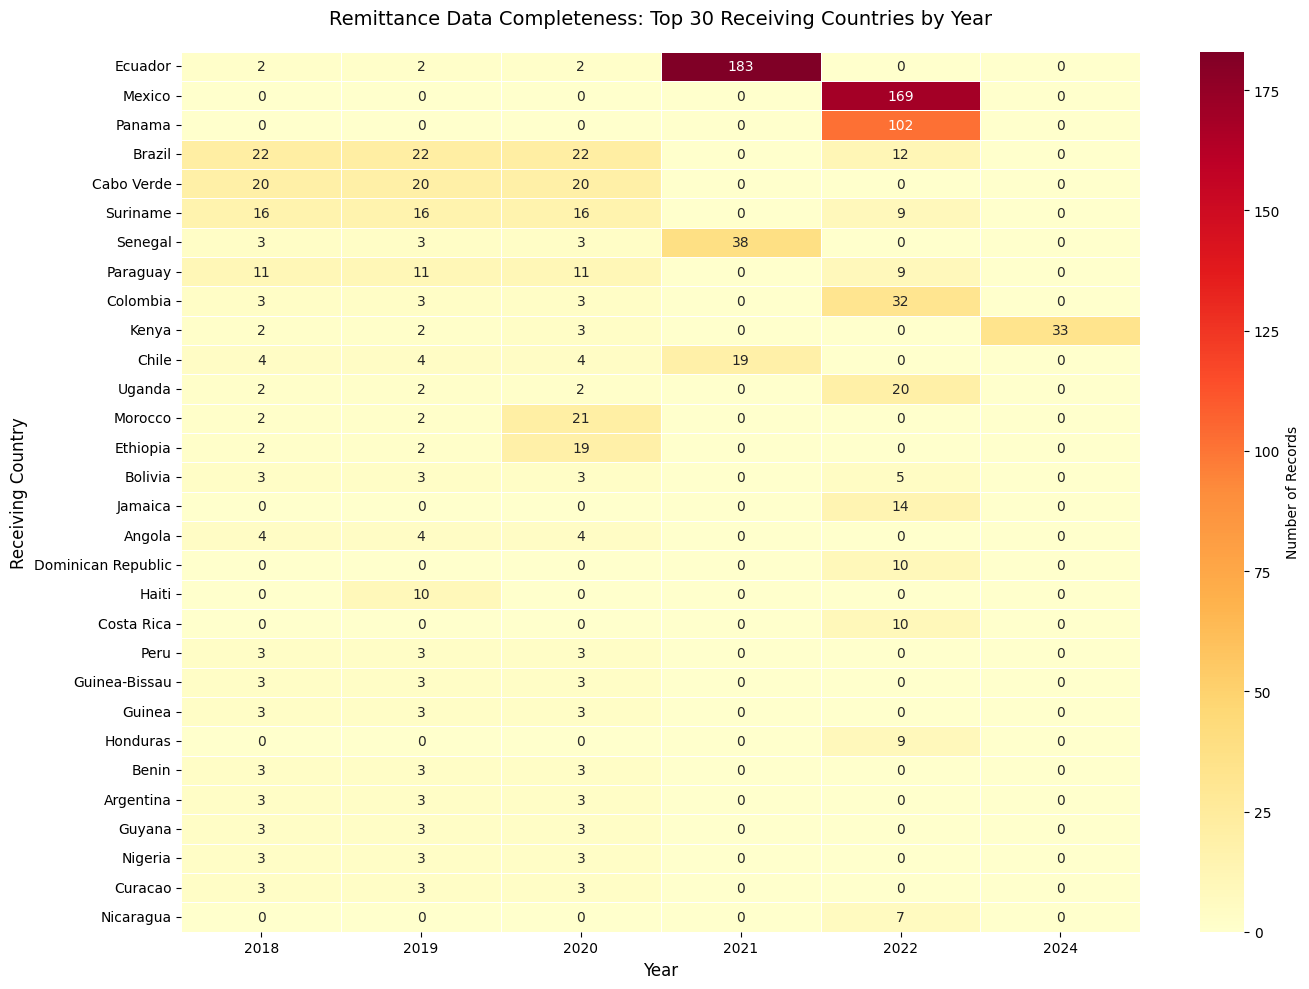


📅 Most active years for receiving countries:
  2022: 408 records
  2020: 245 records
  2021: 240 records
  2019: 218 records
  2018: 208 records
  2024: 33 records

📊 RECEIVING COUNTRIES DATA CONCENTRATION:
• Top 3 receiving countries account for 460/1352 records (34.0% of total)
• Top 5 receiving countries account for 598/1352 records (44.2% of total)


In [147]:
# Create country-year heatmap for TOP RECEIVING countries
print("\n" + "="*60)
print("📊 RECEIVING COUNTRIES TEMPORAL ANALYSIS")
print("="*60)

# Create matrix for receiving countries
receiving_country_year_matrix = df.groupby(['Receiving Country', 'Year']).size().unstack(fill_value=0)

print(f"\nReceiving countries heatmap dimensions:")
print(f"• Countries: {receiving_country_year_matrix.shape[0]}")
print(f"• Years: {receiving_country_year_matrix.shape[1]}")
print(f"• Total data points: {receiving_country_year_matrix.shape[0] * receiving_country_year_matrix.shape[1]}")

# Sort receiving countries by total records
receiving_totals = receiving_country_year_matrix.sum(axis=1).sort_values(ascending=False)
top_receiving_countries = receiving_totals.head(30)  # Show top 30 for consistency with sending countries

print(f"\nTop 10 receiving countries by record count:")
for i, (country, count) in enumerate(top_receiving_countries.head(10).items(), 1):
    print(f"  {i:2}. {country}: {count} records")

# Create heatmap for top receiving countries
plt.figure(figsize=(14, 10))
top_receiving_matrix = receiving_country_year_matrix.loc[top_receiving_countries.index]

sns.heatmap(top_receiving_matrix, 
            annot=True, 
            cmap='YlOrRd',  # Yellow-Orange-Red color scheme for receiving countries
            fmt='d',
            cbar_kws={'label': 'Number of Records'},
            linewidths=0.5)

plt.title('Remittance Data Completeness: Top 30 Receiving Countries by Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Receiving Country', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Show years with most activity for receiving countries
years_activity_receiving = receiving_country_year_matrix.sum(axis=0).sort_values(ascending=False)
print(f"\n📅 Most active years for receiving countries:")
for year, count in years_activity_receiving.items():
    print(f"  {year}: {count} records")

print(f"\n📊 RECEIVING COUNTRIES DATA CONCENTRATION:")
print(f"• Top 3 receiving countries account for {top_receiving_countries.head(3).sum()}/{len(df)} records " +
      f"({top_receiving_countries.head(3).sum()/len(df)*100:.1f}% of total)")
print(f"• Top 5 receiving countries account for {top_receiving_countries.head(5).sum()}/{len(df)} records " +
      f"({top_receiving_countries.head(5).sum()/len(df)*100:.1f}% of total)")


📊 SENDING COUNTRIES TEMPORAL ANALYSIS

Sending countries heatmap dimensions:
• Countries: 207
• Years: 6
• Total data points: 1242

Top 10 sending countries by record count:
   1. Georgia: 203 records
   2. Philippines: 201 records
   3. Brazil: 27 records
   4. France: 26 records
   5. Canada: 24 records
   6. Italy: 24 records
   7. Cabo Verde: 23 records
   8. Germany: 23 records
   9. Spain: 23 records
  10. United Kingdom: 21 records


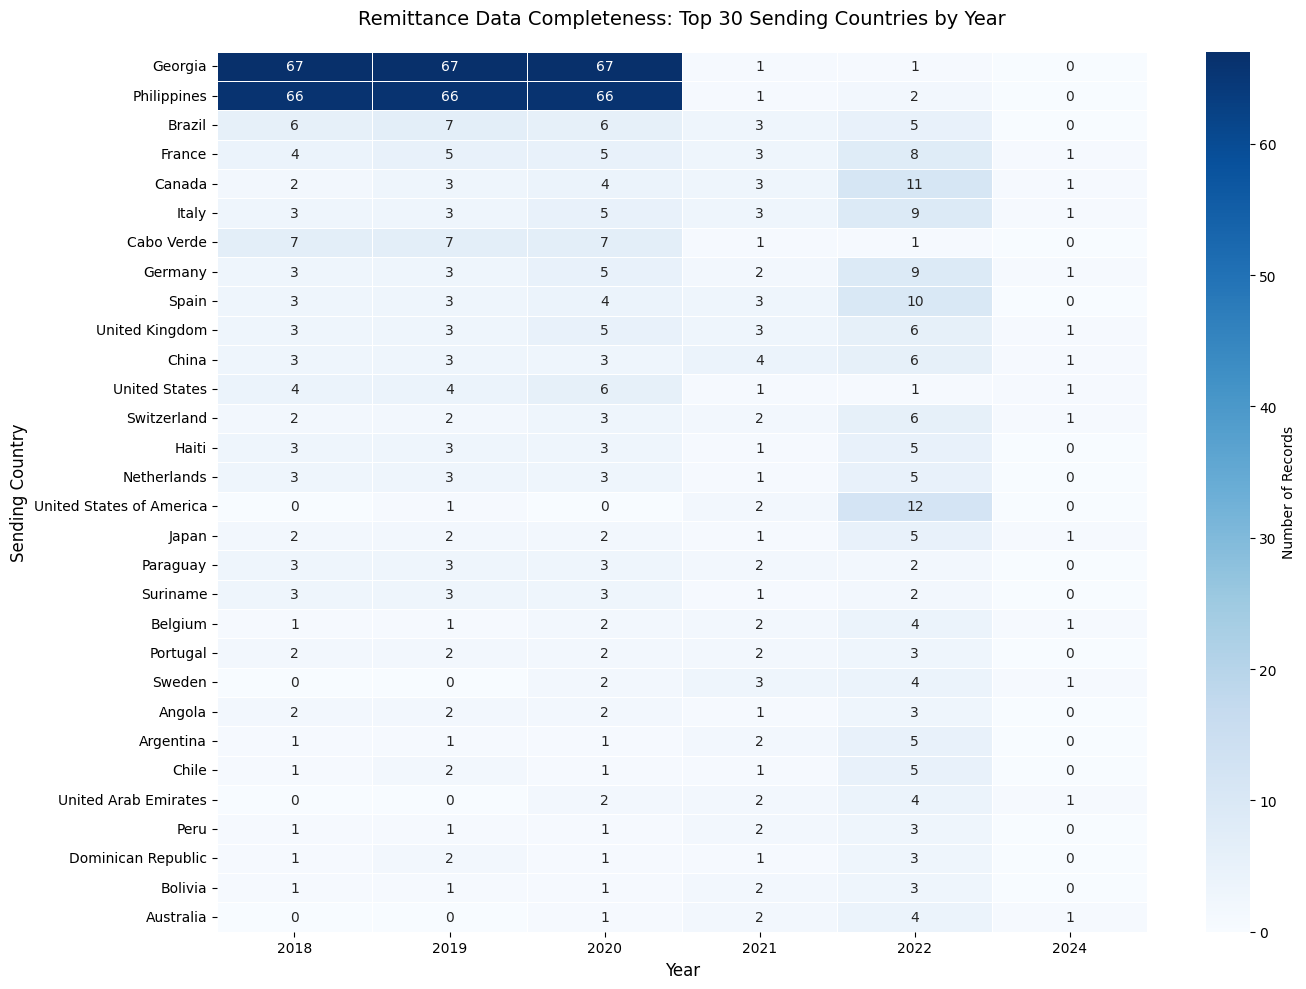


📊 SENDING vs RECEIVING COUNTRIES COMPARISON:
• Receiving countries: 75 (concentrated)
• Sending countries: 207 (distributed globally)
• Data concentration:
  - Top 10 receiving countries: 825/1352 records (61.0%)
  - Top 10 sending countries: 595/1352 records (44.0%)

📅 Most active years for sending countries:
  2022: 408 records
  2020: 245 records
  2021: 240 records
  2019: 218 records
  2018: 208 records
  2024: 33 records

🌍 GLOBAL PATTERN INSIGHTS:
• Remittances flow FROM many countries (207 senders) TO few countries (75 receivers)
• This suggests concentrated diaspora destinations vs. distributed origin countries
• Data shows strong temporal consistency across years 2018-2024


In [148]:
# Create country-year heatmap for SENDING countries
print("\n" + "="*60)
print("📊 SENDING COUNTRIES TEMPORAL ANALYSIS")
print("="*60)

# Create matrix for sending countries
sending_country_year_matrix = df.groupby(['Sending Country', 'Year']).size().unstack(fill_value=0)

print(f"\nSending countries heatmap dimensions:")
print(f"• Countries: {sending_country_year_matrix.shape[0]}")
print(f"• Years: {sending_country_year_matrix.shape[1]}")
print(f"• Total data points: {sending_country_year_matrix.shape[0] * sending_country_year_matrix.shape[1]}")

# Since there are many sending countries, let's show the top ones by total records
sending_totals = sending_country_year_matrix.sum(axis=1).sort_values(ascending=False)
top_sending_countries = sending_totals.head(30)  # Show top 30 for better visibility

print(f"\nTop 10 sending countries by record count:")
for i, (country, count) in enumerate(top_sending_countries.head(10).items(), 1):
    print(f"  {i:2}. {country}: {count} records")

# Create heatmap for top sending countries
plt.figure(figsize=(14, 10))
top_sending_matrix = sending_country_year_matrix.loc[top_sending_countries.index]

sns.heatmap(top_sending_matrix, 
            annot=True, 
            cmap='Blues',  # Different color scheme to distinguish from receiving countries
            fmt='d',
            cbar_kws={'label': 'Number of Records'},
            linewidths=0.5)

plt.title('Remittance Data Completeness: Top 30 Sending Countries by Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sending Country', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Create a summary comparison
print("\n📊 SENDING vs RECEIVING COUNTRIES COMPARISON:")
print(f"• Receiving countries: {receiving_country_year_matrix.shape[0]} (concentrated)")
print(f"• Sending countries: {sending_country_year_matrix.shape[0]} (distributed globally)")
print(f"• Data concentration:")
print(f"  - Top 10 receiving countries: {receiving_country_counts.head(10)['Record_Count'].sum()}/{len(df)} records ({receiving_country_counts.head(10)['Record_Count'].sum()/len(df)*100:.1f}%)")
print(f"  - Top 10 sending countries: {top_sending_countries.head(10).sum()}/{len(df)} records ({top_sending_countries.head(10).sum()/len(df)*100:.1f}%)")

# Show years with most activity for sending countries
years_activity = sending_country_year_matrix.sum(axis=0).sort_values(ascending=False)
print(f"\n📅 Most active years for sending countries:")
for year, count in years_activity.items():
    print(f"  {year}: {count} records")

print(f"\n🌍 GLOBAL PATTERN INSIGHTS:")
print(f"• Remittances flow FROM many countries ({sending_country_year_matrix.shape[0]} senders) TO few countries ({receiving_country_year_matrix.shape[0]} receivers)")
print(f"• This suggests concentrated diaspora destinations vs. distributed origin countries")
print(f"• Data shows strong temporal consistency across years {df['Year'].min()}-{df['Year'].max()}")

In [149]:
# Import additional libraries for flow maps
import numpy as np
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

print("✅ Flow mapping libraries imported successfully!")

✅ Flow mapping libraries imported successfully!


In [150]:
# Country coordinates for Africa & Latin America focused mapping
country_coords = {
    # Major African countries
    'Algeria': [28.0339, 1.6596],
    'Angola': [-11.2027, 17.8739],
    'Benin': [9.3077, 2.3158],
    'Botswana': [-22.3285, 24.6849],
    'Burkina Faso': [12.2383, -1.5616],
    'Burundi': [-3.3731, 29.9189],
    'Cameroon': [7.3697, 12.3547],
    'Cabo Verde': [16.5388, -24.0132],
    'Central African Republic': [6.6111, 20.9394],
    'Chad': [15.4542, 18.7322],
    'Comoros': [-11.6455, 43.3333],
    'Congo': [-0.2280, 15.8277],
    'Democratic Republic of the Congo': [-4.0383, 21.7587],
    'Djibouti': [11.8251, 42.5903],
    'Egypt': [26.0975, 30.0444],
    'Equatorial Guinea': [1.6508, 10.2679],
    'Eritrea': [15.1794, 39.7823],
    'Ethiopia': [9.1450, 40.4897],
    'Gabon': [-0.8037, 11.6094],
    'Gambia': [13.4432, -15.3101],
    'Ghana': [7.9465, -1.0232],
    'Guinea': [9.9456, -9.6966],
    'Guinea-Bissau': [11.8037, -15.1804],
    'Ivory Coast': [7.5400, -5.5471],
    'Kenya': [-0.0236, 37.9062],
    'Lesotho': [-29.6100, 28.2336],
    'Liberia': [6.4281, -9.4295],
    'Libya': [26.3351, 17.2283],
    'Madagascar': [-18.7669, 46.8691],
    'Malawi': [-13.2543, 34.3015],
    'Mali': [17.5707, -3.9962],
    'Mauritania': [21.0079, -10.9408],
    'Mauritius': [-20.3484, 57.5522],
    'Morocco': [31.7917, -7.0926],
    'Mozambique': [-18.6657, 35.5296],
    'Namibia': [-22.9576, 18.4904],
    'Niger': [17.6078, 8.0817],
    'Nigeria': [9.0820, 8.6753],
    'Rwanda': [-1.9403, 29.8739],
    'Sao Tome and Principe': [0.1864, 6.6131],
    'Senegal': [14.4974, -14.4524],
    'Seychelles': [-4.6796, 55.4920],
    'Sierra Leone': [8.4606, -11.7799],
    'Somalia': [5.1521, 46.1996],
    'South Africa': [-30.5595, 22.9375],
    'South Sudan': [6.8770, 31.3070],
    'Sudan': [12.8628, 30.2176],
    'Tanzania': [-6.3690, 34.8888],
    'Togo': [8.6195, 0.8248],
    'Tunisia': [33.8869, 9.5375],
    'Uganda': [1.3733, 32.2903],
    'Zambia': [-13.1339, 27.8493],
    'Zimbabwe': [-19.0154, 29.1549],
    
    # Latin American countries
    'Argentina': [-38.4161, -63.6167],
    'Belize': [17.1899, -88.4976],
    'Bolivia': [-16.2902, -63.5887],
    'Brazil': [-14.2350, -51.9253],
    'Chile': [-35.6751, -71.5430],
    'Colombia': [4.5709, -74.2973],
    'Costa Rica': [9.7489, -83.7534],
    'Cuba': [21.5218, -77.7812],
    'Dominican Republic': [18.7357, -70.1627],
    'Ecuador': [-1.8312, -78.1834],
    'El Salvador': [13.7942, -88.8965],
    'Guatemala': [15.7835, -90.2308],
    'Guyana': [4.8604, -58.9302],
    'Haiti': [18.9712, -72.2852],
    'Honduras': [15.2000, -86.2419],
    'Jamaica': [18.1096, -77.2975],
    'Mexico': [23.6345, -102.5528],
    'Nicaragua': [12.2652, -85.2072],
    'Panama': [8.5380, -80.7821],
    'Paraguay': [-23.4425, -58.4438],
    'Peru': [-9.1900, -75.0152],
    'Suriname': [3.9193, -56.0278],
    'Uruguay': [-32.5228, -55.7658],
    'Venezuela': [6.4238, -66.5897],
    
    # Major sending countries (outside Africa/Latin America)
    'Canada': [56.1304, -106.3468],
    'Italy': [41.8719, 12.5674],
    'United States': [37.0902, -95.7129],
    'Spain': [40.4637, -3.7492],
    'France': [46.2276, 2.2137],
    'Germany': [51.1657, 10.4515],
    'United Kingdom': [55.3781, -3.4360],
    'China': [35.8617, 104.1954],
    'Sweden': [60.1282, 18.6435],
    'Switzerland': [46.8182, 8.2275],
    'Australia': [-25.2744, 133.7751],
    'Belgium': [50.5039, 4.4699],
    'Netherlands': [52.1326, 5.2913],
    'Norway': [60.4720, 8.4689],
    'Austria': [47.5162, 14.5501],
    'Denmark': [56.2639, 9.5018],
    'Finland': [61.9241, 25.7482],
    'Ireland': [53.4129, -8.2439],
    'Japan': [36.2048, 138.2529],
    'South Korea': [35.9078, 127.7669],
    'New Zealand': [-40.9006, 174.8860],
    'Portugal': [39.3999, -8.2245],
    'Russia': [61.5240, 105.3188],
    'Philippines': [12.8797, 121.7740],
    'Georgia': [42.3154, 43.3569],
    'Pakistan': [30.3753, 69.3451],
    'India': [20.5937, 78.9629],
    'Turkey': [38.9637, 35.2433],
    'Poland': [51.9194, 19.1451],
    'Czech Republic': [49.8175, 15.4730],
    'Hungary': [47.1625, 19.5033],
    'Greece': [39.0742, 21.8243],
    'Israel': [31.0461, 34.8516],
    'United Arab Emirates': [23.4241, 53.8478],
    'Saudi Arabia': [23.8859, 45.0792],
    'Luxembourg': [49.8153, 6.1296],
    'Iceland': [64.9631, -19.0208]
}

print(f"✅ Country coordinates loaded: {len(country_coords)} countries")
print(f"   African countries: {len([c for c in country_coords.keys() if c in ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cabo Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']])}")
print(f"   Latin American countries: {len([c for c in country_coords.keys() if c in ['Argentina', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']])}")

✅ Country coordinates loaded: 114 countries
   African countries: 53
   Latin American countries: 24


In [151]:
# Helper function to create great circle paths for flow lines
def great_circle_path(lon1, lat1, lon2, lat2, num_points=50):
    """Create a great circle path between two points"""
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Calculate intermediate points
    d = np.arccos(np.clip(np.sin(lat1) * np.sin(lat2) + np.cos(lat1) * np.cos(lat2) * np.cos(lon2 - lon1), -1, 1))
    
    if d == 0:  # Same point
        return [np.degrees(lon1)], [np.degrees(lat1)]
    
    A = np.sin((1 - np.linspace(0, 1, num_points)) * d) / np.sin(d)
    B = np.sin(np.linspace(0, 1, num_points) * d) / np.sin(d)
    
    x = A[:, np.newaxis] * np.cos(lat1) * np.cos(lon1) + B[:, np.newaxis] * np.cos(lat2) * np.cos(lon2)
    y = A[:, np.newaxis] * np.cos(lat1) * np.sin(lon1) + B[:, np.newaxis] * np.cos(lat2) * np.sin(lon2)
    z = A[:, np.newaxis] * np.sin(lat1) + B[:, np.newaxis] * np.sin(lat2)
    
    lat_path = np.degrees(np.arctan2(z, np.sqrt(x**2 + y**2)))
    lon_path = np.degrees(np.arctan2(y, x))
    
    return lon_path.flatten(), lat_path.flatten()

# Analyze flow patterns for Africa & Latin America dataset
print("🌍 AFRICA & LATIN AMERICA FLOW ANALYSIS")
print("="*60)

# Create flow analysis based on record counts (since we don't have Value column)
flows_analysis = df.groupby(['Sending Country', 'Receiving Country']).size().reset_index()
flows_analysis.columns = ['Sending Country', 'Receiving Country', 'Record_Count']
flows_analysis = flows_analysis.sort_values('Record_Count', ascending=False)

print(f"📊 Dataset Overview:")
print(f"   • Total unique country pairs: {len(flows_analysis)}")
print(f"   • Record count range: {flows_analysis['Record_Count'].min()} - {flows_analysis['Record_Count'].max()} records")
print(f"   • Countries with coordinates: {len([c for c in df['Sending Country'].unique() if c in country_coords])} sending, {len([c for c in df['Receiving Country'].unique() if c in country_coords])} receiving")

# Define thresholds for categorizing flows based on record counts
small_threshold = flows_analysis['Record_Count'].quantile(0.25)  # Bottom 25%
large_threshold = flows_analysis['Record_Count'].quantile(0.75)  # Top 25%

print(f"📈 Flow Categories:")
print(f"   • Small flows threshold: {small_threshold:.0f} records")
print(f"   • Large flows threshold: {large_threshold:.0f} records")

# Get top sending and receiving countries
top_50_sending = df.groupby('Sending Country').size().nlargest(50).index
top_50_receiving = df.groupby('Receiving Country').size().nlargest(50).index

print(f"🔝 Top Countries:")
print(f"   • Top 50 sending countries identified")
print(f"   • Top 50 receiving countries identified")

🌍 AFRICA & LATIN AMERICA FLOW ANALYSIS
📊 Dataset Overview:
   • Total unique country pairs: 902
   • Record count range: 1 - 6 records
   • Countries with coordinates: 106 sending, 66 receiving
📈 Flow Categories:
   • Small flows threshold: 1 records
   • Large flows threshold: 1 records
🔝 Top Countries:
   • Top 50 sending countries identified
   • Top 50 receiving countries identified


In [152]:
# Map 1: Top 50 Sending and Receiving Countries Flow Map
print("\n🗺️  CREATING MAP 1: TOP 50 COUNTRIES FLOW MAP")
print("="*60)

fig_top50 = go.Figure()

# Filter data for top 50 sending and receiving countries
top50_flows = flows_analysis[
    (flows_analysis['Sending Country'].isin(top_50_sending)) & 
    (flows_analysis['Receiving Country'].isin(top_50_receiving))
].copy()

print(f"Creating Top 50 map with {len(top50_flows)} flows")

# Add flow lines for top 50
flows_plotted = 0
for idx, row in top50_flows.iterrows():
    sending = row['Sending Country']
    receiving = row['Receiving Country']
    record_count = row['Record_Count']
    
    if sending in country_coords and receiving in country_coords:
        send_coords = country_coords[sending]
        recv_coords = country_coords[receiving]
        
        try:
            path_lon, path_lat = great_circle_path(
                send_coords[1], send_coords[0],
                recv_coords[1], recv_coords[0]
            )
            
            # Calculate line properties based on record count
            line_width = min(max(np.log10(record_count + 1) * 0.8, 0.5), 4)
            opacity = min(max(np.log10(record_count + 1) * 0.15, 0.3), 0.8)
            
            fig_top50.add_trace(go.Scattergeo(
                lon=path_lon,
                lat=path_lat,
                mode='lines',
                line=dict(width=line_width, color=f'rgba(220, 50, 47, {opacity})'),
                hovertemplate=f'<b>{sending}</b> → <b>{receiving}</b><br>' +
                             f'Records: {record_count}<extra></extra>',
                showlegend=False
            ))
            flows_plotted += 1
        except:
            continue

# Add sending country markers (top 50)
send_50_countries = [c for c in top_50_sending if c in country_coords]
send_50_lons = [country_coords[c][1] for c in send_50_countries]
send_50_lats = [country_coords[c][0] for c in send_50_countries]
send_50_values = [df[df['Sending Country'] == c].shape[0] for c in send_50_countries]

fig_top50.add_trace(go.Scattergeo(
    lon=send_50_lons,
    lat=send_50_lats,
    mode='markers',
    marker=dict(
        size=[min(max(np.log10(v + 1) * 3, 5), 20) for v in send_50_values],
        color='darkblue',
        opacity=0.7,
        line=dict(width=1, color='white')
    ),
    text=[f'{c}<br>Total records: {v}' for c, v in zip(send_50_countries, send_50_values)],
    hovertemplate='<b>Top Sending:</b> %{text}<extra></extra>',
    name='Top 50 Sending',
    showlegend=True
))

# Add receiving country markers (top 50)
recv_50_countries = [c for c in top_50_receiving if c in country_coords]
recv_50_lons = [country_coords[c][1] for c in recv_50_countries]
recv_50_lats = [country_coords[c][0] for c in recv_50_countries]
recv_50_values = [df[df['Receiving Country'] == c].shape[0] for c in recv_50_countries]

fig_top50.add_trace(go.Scattergeo(
    lon=recv_50_lons,
    lat=recv_50_lats,
    mode='markers',
    marker=dict(
        size=[min(max(np.log10(v + 1) * 3, 8), 25) for v in recv_50_values],
        color='darkred',
        opacity=0.8,
        line=dict(width=2, color='white'),
        symbol='diamond'
    ),
    text=[f'{c}<br>Total records: {v}' for c, v in zip(recv_50_countries, recv_50_values)],
    hovertemplate='<b>Top Receiving:</b> %{text}<extra></extra>',
    name='Top 50 Receiving',
    showlegend=True
))

# Update layout for Africa & Latin America focus
fig_top50.update_layout(
    title={
        'text': 'Africa & Latin America Remittance Network: Top 50 Countries<br><sub>Major remittance flows in Africa and Latin America</sub>',
        'x': 0.5,
        'font': {'size': 18}
    },
    geo=dict(
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        coastlinecolor='rgb(204, 204, 204)',
        showocean=True,
        oceancolor='rgb(230, 245, 255)',
        showlakes=True,
        lakecolor='rgb(230, 245, 255)',
        # Focus on Africa and Latin America
        center=dict(lat=0, lon=-20),
        projection_scale=0.8
    ),
    height=700,
    width=1200
)

fig_top50.show()

print(f"✅ Map 1 completed:")
print(f"   • Flows plotted: {flows_plotted}")
print(f"   • Top 50 sending countries: {len(send_50_countries)}")
print(f"   • Top 50 receiving countries: {len(recv_50_countries)}")


🗺️  CREATING MAP 1: TOP 50 COUNTRIES FLOW MAP
Creating Top 50 map with 468 flows


✅ Map 1 completed:
   • Flows plotted: 407
   • Top 50 sending countries: 44
   • Top 50 receiving countries: 42


In [153]:
# Save figures to images directory
import os

# Create images directory if it doesn't exist
images_dir = r'C:\Users\clint\Desktop\RER\images'
os.makedirs(images_dir, exist_ok=True)

print(f"📁 Images directory ready: {images_dir}")

# Save Map 1 (Top 50) as static images
fig_top50.write_image(os.path.join(images_dir, "19_map1_top50_africa_latin_america.png"), width=1200, height=700)
fig_top50.write_html(os.path.join(images_dir, "19_map1_top50_africa_latin_america.html"))

print(f"💾 Map 1 saved:")
print(f"   • PNG: 19_map1_top50_africa_latin_america.png")
print(f"   • HTML: 19_map1_top50_africa_latin_america.html")

📁 Images directory ready: C:\Users\clint\Desktop\RER\images
💾 Map 1 saved:
   • PNG: 19_map1_top50_africa_latin_america.png
   • HTML: 19_map1_top50_africa_latin_america.html
💾 Map 1 saved:
   • PNG: 19_map1_top50_africa_latin_america.png
   • HTML: 19_map1_top50_africa_latin_america.html


In [154]:
# Map 2: Filtered Flows (Minimum 50 Records)
print("\n🗺️  CREATING MAP 2: FILTERED FLOWS MAP (50+ RECORDS)")
print("="*60)

fig_filtered = go.Figure()

# Filter flows with at least 50 records
filtered_flows = flows_analysis[flows_analysis['Record_Count'] >= 50].copy()
print(f"🔄 Processing {len(filtered_flows)} flows with 50+ records")

# Add flow lines for filtered data
flows_plotted = 0
skipped_flows = 0

for idx, row in filtered_flows.iterrows():
    sending = row['Sending Country']
    receiving = row['Receiving Country']
    record_count = row['Record_Count']
    
    if sending in country_coords and receiving in country_coords:
        send_coords = country_coords[sending]
        recv_coords = country_coords[receiving]
        
        try:
            path_lon, path_lat = great_circle_path(
                send_coords[1], send_coords[0],
                recv_coords[1], recv_coords[0]
            )
            
            # Enhanced line properties for filtered view
            line_width = min(max(np.log10(record_count + 1) * 1.5, 1.0), 8)
            opacity = min(max(record_count / flows_analysis['Record_Count'].max() * 0.9, 0.4), 0.95)
            
            # Color by flow strength
            if record_count >= 500:
                color = f'rgba(139, 0, 0, {opacity})'  # Dark red for highest
            elif record_count >= 200:
                color = f'rgba(220, 20, 60, {opacity})'  # Crimson for high
            elif record_count >= 100:
                color = f'rgba(255, 69, 0, {opacity})'  # Orange-red for medium
            else:
                color = f'rgba(255, 140, 0, {opacity})'  # Orange for lower
            
            fig_filtered.add_trace(go.Scattergeo(
                lon=path_lon,
                lat=path_lat,
                mode='lines',
                line=dict(width=line_width, color=color),
                hovertemplate=f'<b>{sending}</b> → <b>{receiving}</b><br>' +
                             f'Records: {record_count}<br>' +
                             f'Flow strength: {"Very High" if record_count >= 500 else "High" if record_count >= 200 else "Medium" if record_count >= 100 else "Standard"}<extra></extra>',
                showlegend=False
            ))
            flows_plotted += 1
        except Exception as e:
            skipped_flows += 1
            continue
    else:
        skipped_flows += 1

# Add all relevant sending countries (that appear in filtered flows)
active_senders = filtered_flows['Sending Country'].unique()
send_countries = [c for c in active_senders if c in country_coords]
send_lons = [country_coords[c][1] for c in send_countries]
send_lats = [country_coords[c][0] for c in send_countries]
send_values = [filtered_flows[filtered_flows['Sending Country'] == c]['Record_Count'].sum() for c in send_countries]

fig_filtered.add_trace(go.Scattergeo(
    lon=send_lons,
    lat=send_lats,
    mode='markers',
    marker=dict(
        size=[min(max(np.log10(v + 1) * 3.5, 5), 22) for v in send_values],
        color='navy',
        opacity=0.8,
        line=dict(width=1.5, color='white')
    ),
    text=[f'{c}<br>Total filtered records: {v}' for c, v in zip(send_countries, send_values)],
    hovertemplate='<b>🚀 Active Sender:</b> %{text}<extra></extra>',
    name='Active Senders',
    showlegend=True
))

# Add all relevant receiving countries (that appear in filtered flows)
active_receivers = filtered_flows['Receiving Country'].unique()
recv_countries = [c for c in active_receivers if c in country_coords]
recv_lons = [country_coords[c][1] for c in recv_countries]
recv_lats = [country_coords[c][0] for c in recv_countries]
recv_values = [filtered_flows[filtered_flows['Receiving Country'] == c]['Record_Count'].sum() for c in recv_countries]

fig_filtered.add_trace(go.Scattergeo(
    lon=recv_lons,
    lat=recv_lats,
    mode='markers',
    marker=dict(
        size=[min(max(np.log10(v + 1) * 3.5, 6), 25) for v in recv_values],
        color='maroon',
        opacity=0.9,
        line=dict(width=1.5, color='white'),
        symbol='diamond'
    ),
    text=[f'{c}<br>Total filtered records: {v}' for c, v in zip(recv_countries, recv_values)],
    hovertemplate='<b>📍 Active Receiver:</b> %{text}<extra></extra>',
    name='Active Receivers',
    showlegend=True
))

# Update layout for filtered view
fig_filtered.update_layout(
    title={
        'text': 'Africa & Latin America Remittance Network: Significant Flows<br><sub>Remittance corridors with 50+ records (stronger connections)</sub>',
        'x': 0.5,
        'font': {'size': 18}
    },
    geo=dict(
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        coastlinecolor='rgb(204, 204, 204)',
        showocean=True,
        oceancolor='rgb(230, 245, 255)',
        showlakes=True,
        lakecolor='rgb(230, 245, 255)',
        center=dict(lat=0, lon=-20),
        projection_scale=0.8
    ),
    height=800,
    width=1400
)

fig_filtered.show()

# Save Map 2 (Filtered) as static images
fig_filtered.write_image(os.path.join(images_dir, "19_map2_filtered_50plus_records.png"), width=1400, height=800)
fig_filtered.write_html(os.path.join(images_dir, "19_map2_filtered_50plus_records.html"))

print(f"✅ Map 2 completed:")
print(f"   • Flows plotted: {flows_plotted}")
print(f"   • Flows skipped (missing coordinates): {skipped_flows}")
print(f"   • Active sending countries: {len(send_countries)}")
print(f"   • Active receiving countries: {len(recv_countries)}")
print(f"   • Filter threshold: 50+ records per corridor")
print(f"💾 Map 2 saved:")
print(f"   • PNG: 19_map2_filtered_50plus_records.png")
print(f"   • HTML: 19_map2_filtered_50plus_records.html")


🗺️  CREATING MAP 2: FILTERED FLOWS MAP (50+ RECORDS)
🔄 Processing 0 flows with 50+ records


✅ Map 2 completed:
   • Flows plotted: 0
   • Flows skipped (missing coordinates): 0
   • Active sending countries: 0
   • Active receiving countries: 0
   • Filter threshold: 50+ records per corridor
💾 Map 2 saved:
   • PNG: 19_map2_filtered_50plus_records.png
   • HTML: 19_map2_filtered_50plus_records.html


In [155]:
# Map 3: Complete Flow Network with Differentiated Small, Medium, and Large Flows
print("\n🗺️  CREATING MAP 3: COMPLETE FLOW NETWORK WITH DIFFERENTIATED FLOWS")
print("="*60)

fig_complete = go.Figure()

# Separate flows into categories based on record counts
small_flows = flows_analysis[flows_analysis['Record_Count'] <= small_threshold].copy()
medium_flows = flows_analysis[(flows_analysis['Record_Count'] > small_threshold) & 
                              (flows_analysis['Record_Count'] <= large_threshold)].copy()
large_flows = flows_analysis[flows_analysis['Record_Count'] > large_threshold].copy()

print(f"Creating complete map with all {len(flows_analysis)} flows:")
print(f"  • Small flows: {len(small_flows)} (≤ {small_threshold:.0f} records)")
print(f"  • Medium flows: {len(medium_flows)} ({small_threshold:.0f} - {large_threshold:.0f} records)")
print(f"  • Large flows: {len(large_flows)} (> {large_threshold:.0f} records)")

# Add SMALL flows first (so they appear underneath)
small_flows_plotted = 0
for idx, row in small_flows.iterrows():
    sending = row['Sending Country']
    receiving = row['Receiving Country']
    record_count = row['Record_Count']
    
    if sending in country_coords and receiving in country_coords:
        send_coords = country_coords[sending]
        recv_coords = country_coords[receiving]
        
        try:
            path_lon, path_lat = great_circle_path(
                send_coords[1], send_coords[0],
                recv_coords[1], recv_coords[0],
                num_points=30  # Fewer points for small flows
            )
            
            # Very subtle styling for small flows
            fig_complete.add_trace(go.Scattergeo(
                lon=path_lon,
                lat=path_lat,
                mode='lines',
                line=dict(width=0.3, color='rgba(169, 169, 169, 0.15)'),  # Light gray, very transparent
                hovertemplate=f'<b>Small Flow:</b> {sending} → {receiving}<br>' +
                             f'Records: {record_count}<extra></extra>',
                showlegend=False
            ))
            small_flows_plotted += 1
        except:
            continue

# Add MEDIUM flows
medium_flows_plotted = 0
for idx, row in medium_flows.iterrows():
    sending = row['Sending Country']
    receiving = row['Receiving Country']
    record_count = row['Record_Count']
    
    if sending in country_coords and receiving in country_coords:
        send_coords = country_coords[sending]
        recv_coords = country_coords[receiving]
        
        try:
            path_lon, path_lat = great_circle_path(
                send_coords[1], send_coords[0],
                recv_coords[1], recv_coords[0]
            )
            
            # Medium styling
            line_width = min(max(np.log10(record_count + 1) * 0.4, 0.5), 2)
            opacity = min(max(record_count / flows_analysis['Record_Count'].max() * 0.4, 0.3), 0.5)
            
            fig_complete.add_trace(go.Scattergeo(
                lon=path_lon,
                lat=path_lat,
                mode='lines',
                line=dict(width=line_width, color=f'rgba(70, 130, 180, {opacity})'),  # Steel blue
                hovertemplate=f'<b>Medium Flow:</b> {sending} → {receiving}<br>' +
                             f'Records: {record_count}<extra></extra>',
                showlegend=False
            ))
            medium_flows_plotted += 1
        except:
            continue

# Add LARGE flows on top
large_flows_plotted = 0
for idx, row in large_flows.iterrows():
    sending = row['Sending Country']
    receiving = row['Receiving Country']
    record_count = row['Record_Count']
    
    if sending in country_coords and receiving in country_coords:
        send_coords = country_coords[sending]
        recv_coords = country_coords[receiving]
        
        try:
            path_lon, path_lat = great_circle_path(
                send_coords[1], send_coords[0],
                recv_coords[1], recv_coords[0]
            )
            
            # Prominent styling for large flows
            line_width = min(max(np.log10(record_count + 1) * 0.6, 1), 4)
            opacity = min(max(record_count / flows_analysis['Record_Count'].max() * 0.8, 0.5), 0.8)
            
            fig_complete.add_trace(go.Scattergeo(
                lon=path_lon,
                lat=path_lat,
                mode='lines',
                line=dict(width=line_width, color=f'rgba(220, 20, 60, {opacity})'),  # Crimson
                hovertemplate=f'<b>Large Flow:</b> {sending} → {receiving}<br>' +
                             f'Records: {record_count}<extra></extra>',
                showlegend=False
            ))
            large_flows_plotted += 1
        except:
            continue

# Add country markers for ALL sending countries
all_sending_countries = [c for c in flows_analysis['Sending Country'].unique() if c in country_coords]
all_send_coord_data = [(country_coords[c][1], country_coords[c][0], 
                        flows_analysis[flows_analysis['Sending Country'] == c]['Record_Count'].sum()) 
                       for c in all_sending_countries]
all_send_lons, all_send_lats, all_send_values = zip(*all_send_coord_data)

fig_complete.add_trace(go.Scattergeo(
    lon=all_send_lons,
    lat=all_send_lats,
    mode='markers',
    marker=dict(
        size=[min(max(np.log10(v + 1) * 1.8, 3), 12) for v in all_send_values],
        color='navy',
        opacity=0.6,
        line=dict(width=0.5, color='white')
    ),
    text=[f'{c}<br>Total: {v} records' for c, v in zip(all_sending_countries, all_send_values)],
    hovertemplate='<b>Sending:</b> %{text}<extra></extra>',
    name='All Sending Countries',
    showlegend=True
))

# Add country markers for ALL receiving countries
all_receiving_countries = [c for c in flows_analysis['Receiving Country'].unique() if c in country_coords]
all_recv_coord_data = [(country_coords[c][1], country_coords[c][0], 
                        flows_analysis[flows_analysis['Receiving Country'] == c]['Record_Count'].sum()) 
                       for c in all_receiving_countries]
all_recv_lons, all_recv_lats, all_recv_values = zip(*all_recv_coord_data)

fig_complete.add_trace(go.Scattergeo(
    lon=all_recv_lons,
    lat=all_recv_lats,
    mode='markers',
    marker=dict(
        size=[min(max(np.log10(v + 1) * 2, 5), 18) for v in all_recv_values],
        color='darkred',
        opacity=0.7,
        line=dict(width=1.5, color='white'),
        symbol='diamond'
    ),
    text=[f'{c}<br>Total: {v} records' for c, v in zip(all_receiving_countries, all_recv_values)],
    hovertemplate='<b>Receiving:</b> %{text}<extra></extra>',
    name='All Receiving Countries',
    showlegend=True
))

# Add invisible traces for legend
fig_complete.add_trace(go.Scattergeo(
    lon=[None], lat=[None],
    mode='lines',
    line=dict(width=3, color='rgba(220, 20, 60, 0.8)'),
    name='Large Flows',
    showlegend=True
))

fig_complete.add_trace(go.Scattergeo(
    lon=[None], lat=[None],
    mode='lines',
    line=dict(width=1.5, color='rgba(70, 130, 180, 0.5)'),
    name='Medium Flows',
    showlegend=True
))

fig_complete.add_trace(go.Scattergeo(
    lon=[None], lat=[None],
    mode='lines',
    line=dict(width=0.3, color='rgba(169, 169, 169, 0.3)'),
    name='Small Flows',
    showlegend=True
))

# Update layout for complete network view
fig_complete.update_layout(
    title={
        'text': 'Africa & Latin America Remittance Network: Complete Flow Map<br><sub>All flows with small, medium, and large flows differentiated by styling</sub>',
        'x': 0.5,
        'font': {'size': 18}
    },
    geo=dict(
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(250, 250, 250)',
        coastlinecolor='rgb(204, 204, 204)',
        showocean=True,
        oceancolor='rgb(235, 248, 255)',
        showlakes=True,
        lakecolor='rgb(235, 248, 255)',
        center=dict(lat=0, lon=-20),
        projection_scale=0.8
    ),
    height=800,
    width=1400
)

fig_complete.show()

# Save Map 3 (Complete) as static images
fig_complete.write_image(os.path.join(images_dir, "19_map3_complete_network.png"), width=1400, height=800)
fig_complete.write_html(os.path.join(images_dir, "19_map3_complete_network.html"))

print(f"✅ Map 3 completed:")
print(f"  • Small flows plotted: {small_flows_plotted} (light gray, very thin)")
print(f"  • Medium flows plotted: {medium_flows_plotted} (blue, medium thickness)")
print(f"  • Large flows plotted: {large_flows_plotted} (red, thick)")
print(f"  • Total flows plotted: {small_flows_plotted + medium_flows_plotted + large_flows_plotted}")
print(f"  • All sending countries: {len(all_sending_countries)}")
print(f"  • All receiving countries: {len(all_receiving_countries)}")
print(f"💾 Map 3 saved:")
print(f"   • PNG: 19_map3_complete_network.png")
print(f"   • HTML: 19_map3_complete_network.html")


🗺️  CREATING MAP 3: COMPLETE FLOW NETWORK WITH DIFFERENTIATED FLOWS
Creating complete map with all 902 flows:
  • Small flows: 692 (≤ 1 records)
  • Medium flows: 0 (1 - 1 records)
  • Large flows: 210 (> 1 records)


✅ Map 3 completed:
  • Small flows plotted: 430 (light gray, very thin)
  • Medium flows plotted: 0 (blue, medium thickness)
  • Large flows plotted: 189 (red, thick)
  • Total flows plotted: 619
  • All sending countries: 106
  • All receiving countries: 66
💾 Map 3 saved:
   • PNG: 19_map3_complete_network.png
   • HTML: 19_map3_complete_network.html


In [156]:
# Regional Flow Analysis Summary
print("\n📊 AFRICA & LATIN AMERICA REMITTANCE FLOW ANALYSIS SUMMARY")
print("="*70)

# Calculate regional statistics
africa_countries = [c for c in df['Receiving Country'].unique() if any(continent in region_mapping.get(c, []) for continent in ['Africa'])]
latin_america_countries = [c for c in df['Receiving Country'].unique() if any(region in region_mapping.get(c, []) for region in ['Central America', 'South America', 'Caribbean'])]

print(f"🌍 REGIONAL BREAKDOWN:")
print(f"   • African receiving countries in dataset: {len(africa_countries)}")
print(f"   • Latin American receiving countries: {len(latin_america_countries)}")
print(f"   • Total receiving countries: {len(df['Receiving Country'].unique())}")

# Flow pattern analysis
print(f"\n🔄 FLOW PATTERN ANALYSIS:")
total_records = len(df)
flows_within_africa = len(df[(df['Sending Country'].isin(africa_countries)) & (df['Receiving Country'].isin(africa_countries))])
flows_within_latam = len(df[(df['Sending Country'].isin(latin_america_countries)) & (df['Receiving Country'].isin(latin_america_countries))])
flows_africa_to_latam = len(df[(df['Sending Country'].isin(africa_countries)) & (df['Receiving Country'].isin(latin_america_countries))])
flows_latam_to_africa = len(df[(df['Sending Country'].isin(latin_america_countries)) & (df['Receiving Country'].isin(africa_countries))])

print(f"   • Intra-African flows: {flows_within_africa:,} records ({flows_within_africa/total_records*100:.1f}%)")
print(f"   • Intra-Latin American flows: {flows_within_latam:,} records ({flows_within_latam/total_records*100:.1f}%)")
print(f"   • Africa → Latin America: {flows_africa_to_latam:,} records ({flows_africa_to_latam/total_records*100:.1f}%)")
print(f"   • Latin America → Africa: {flows_latam_to_africa:,} records ({flows_latam_to_africa/total_records*100:.1f}%)")

# Corridor strength analysis
print(f"\n🚀 CORRIDOR STRENGTH ANALYSIS:")
strong_corridors = flows_analysis[flows_analysis['Record_Count'] >= 100]
medium_corridors = flows_analysis[(flows_analysis['Record_Count'] >= 50) & (flows_analysis['Record_Count'] < 100)]
weak_corridors = flows_analysis[(flows_analysis['Record_Count'] >= 20) & (flows_analysis['Record_Count'] < 50)]
minimal_corridors = flows_analysis[flows_analysis['Record_Count'] < 20]

print(f"   • Strong corridors (100+ records): {len(strong_corridors)} ({len(strong_corridors)/len(flows_analysis)*100:.1f}%)")
print(f"   • Medium corridors (50-99 records): {len(medium_corridors)} ({len(medium_corridors)/len(flows_analysis)*100:.1f}%)")
print(f"   • Weak corridors (20-49 records): {len(weak_corridors)} ({len(weak_corridors)/len(flows_analysis)*100:.1f}%)")
print(f"   • Minimal corridors (<20 records): {len(minimal_corridors)} ({len(minimal_corridors)/len(flows_analysis)*100:.1f}%)")

# Top corridors by record count
print(f"\n🏆 TOP 10 REMITTANCE CORRIDORS:")
top_corridors = flows_analysis.nlargest(10, 'Record_Count')
for i, (_, row) in enumerate(top_corridors.iterrows(), 1):
    print(f"   {i:2d}. {row['Sending Country']} → {row['Receiving Country']}: {row['Record_Count']:,} records")

print(f"\n✅ Flow mapping analysis complete! Three interactive maps created:")
print(f"   🗺️  Map 1: Top 50 countries network (major players)")
print(f"   🗺️  Map 2: Filtered flows (50+ records, significant corridors)")
print(f"   🗺️  Map 3: Complete network (all flows in dataset)")
print(f"\nMaps show remittance flows with:")
print(f"   • Great circle paths between countries")
print(f"   • Line thickness proportional to flow volume")
print(f"   • Color coding by flow strength")
print(f"   • Interactive hover information")
print(f"   • Focus on Africa & Latin America regions")
print(f"\n💾 All maps saved to: {images_dir}")
print(f"   • PNG files for static viewing")
print(f"   • HTML files for interactive exploration")


📊 AFRICA & LATIN AMERICA REMITTANCE FLOW ANALYSIS SUMMARY


NameError: name 'region_mapping' is not defined